# Public Equity Prediction
## Information on Dataset variables
### Input Variables
    1.DEMA (for Google): The Double Exponential Moving Average (DEMA) is a trend indicator that smooths price data and reacts faster to recent price changes compared to other moving averages. It helps in identifying trend reversals and strength for Google stock.

    2.EMA (for Google): The Exponential Moving Average (EMA) assigns greater weight to more recent prices to make it more responsive to new information. It's used to analyze short-term price movements and trend direction for Google stock. 

    3.ADX (for Google): The Average Directional Index (ADX) is used to measure the strength of a trend regardless of its direction. It ranges from 0 to 100, where high values signal a strong trend in Google’s stock price. 

    4.CCI (for Google): The Commodity Channel Index (CCI) is a momentum-based oscillator that measures the deviation of Google’s stock price from its statistical mean. It is used to identify potential reversals or trend continuations. 

    5.RSI (for Google): The Relative Strength Index (RSI) is a momentum oscillator that ranges from 0 to 100. It helps detect overbought or oversold conditions in Google’s stock, indicating potential price reversals.

    6.SMA (for Google): The Simple Moving Average (SMA) calculates the average of closing prices over a given time period. For Google, it is useful in identifying long-term trends and smoothing out short-term volatility. 

    7.High (for TMSC): Represents the highest intraday stock price recorded for Taiwan Semiconductor Manufacturing Company (TMSC). Google relies on TMSC for the chips used in its data centers and servers. 

    8.High (for Nvidia): Indicates the highest price reached by Nvidia stock within the observed timeframe. Google depends on Nvidia's GPUs for AI model training and infrastructure. 

    9.High (for Microsoft): Denotes the highest value attained by Microsoft stock during a specific time interval. Microsoft is a major competitor to Google in cloud, AI, and search services. 

    10.High (for Meta): Represents the peak share price of Meta over a defined period. Meta is a direct competitor to Google in advertising, digital platforms, and user engagement. 

### Output Variable
    1.High (for Google): Indicates the highest price reached by Google stock during the prediction window. This is the value to be predicted based on the given technical and comparative indicators.


In [46]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [47]:
df = pd.read_csv("alphabet_stock_analysis.csv")
df

,Date,High,DEMA,EMA,ADX,CCI,RSI,SMA,TMSC,NVIDIA,Microsoft,META
0,2025-07-17,184.060,183.6603,180.5593,6.7028,146.1457,52.6404,168.5239,248.28,174.16,513.370,705.9000
1,2025-07-16,184.327,183.0602,180.0207,6.7455,150.2088,52.7011,168.5323,238.31,171.75,506.720,713.9700
2,2025-07-15,184.220,182.2028,179.3582,6.7817,145.5709,52.6794,168.5376,237.71,172.40,508.300,724.4716
3,2025-07-14,183.670,181.1445,178.6102,6.8187,136.5120,52.5689,168.5456,229.85,165.49,503.970,728.0000
4,2025-07-11,181.430,179.9776,177.8318,6.8583,116.0054,52.1180,168.5641,232.27,167.89,505.030,725.1600
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-02-28,170.610,175.2067,181.8500,8.6070,-70.9315,48.7838,182.5628,182.16,125.09,397.630,669.6300
96,2025-02-27,174.560,177.7688,183.6420,8.6468,-63.7843,49.6806,182.5213,194.77,135.01,405.740,688.6469
97,2025-02-26,176.080,179.7883,185.1036,8.6922,-44.5962,50.0310,182.4492,196.08,133.73,403.600,683.0078
98,2025-02-25,178.740,181.8767,186.5566,8.7542,-27.2060,50.6499,182.3782,193.53,130.20,401.915,668.0000


In [48]:
df.shape

(100, 12)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       100 non-null    object 
 1   High       100 non-null    float64
 2   DEMA       100 non-null    float64
 3   EMA        100 non-null    float64
 4   ADX        100 non-null    float64
 5   CCI        100 non-null    float64
 6   RSI        100 non-null    float64
 7   SMA        100 non-null    float64
 8   TMSC       100 non-null    float64
 9   NVIDIA     100 non-null    float64
 10  Microsoft  100 non-null    float64
 11  META       100 non-null    float64
dtypes: float64(11), object(1)
memory usage: 9.5+ KB


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
High,100.0,168.688667,8.829283,148.9450,161.917500,168.46750,176.082500,184.3270
DEMA,100.0,168.063897,8.977215,152.3721,160.781250,168.44730,175.575375,183.6935
EMA,100.0,169.047598,8.007920,156.1271,160.904250,169.51990,175.091950,187.8250
ADX,100.0,8.325490,0.675960,6.7028,8.103800,8.40130,8.884375,9.1370
CCI,100.0,-39.934796,80.640696,-182.6641,-100.955650,-55.38590,6.339025,150.2088
RSI,100.0,49.172308,2.072000,44.8285,47.613325,49.33125,50.937700,52.7011
SMA,100.0,177.081600,5.199737,168.5239,172.432500,178.65670,182.433225,183.1417
TMSC,100.0,191.117261,25.211879,150.2800,173.751150,186.95500,211.250000,248.2800
NVIDIA,100.0,130.191287,19.457626,99.4400,114.410000,124.39500,144.412500,174.1600
Microsoft,100.0,434.190850,46.122142,364.4800,391.863750,438.78000,473.940000,513.3700


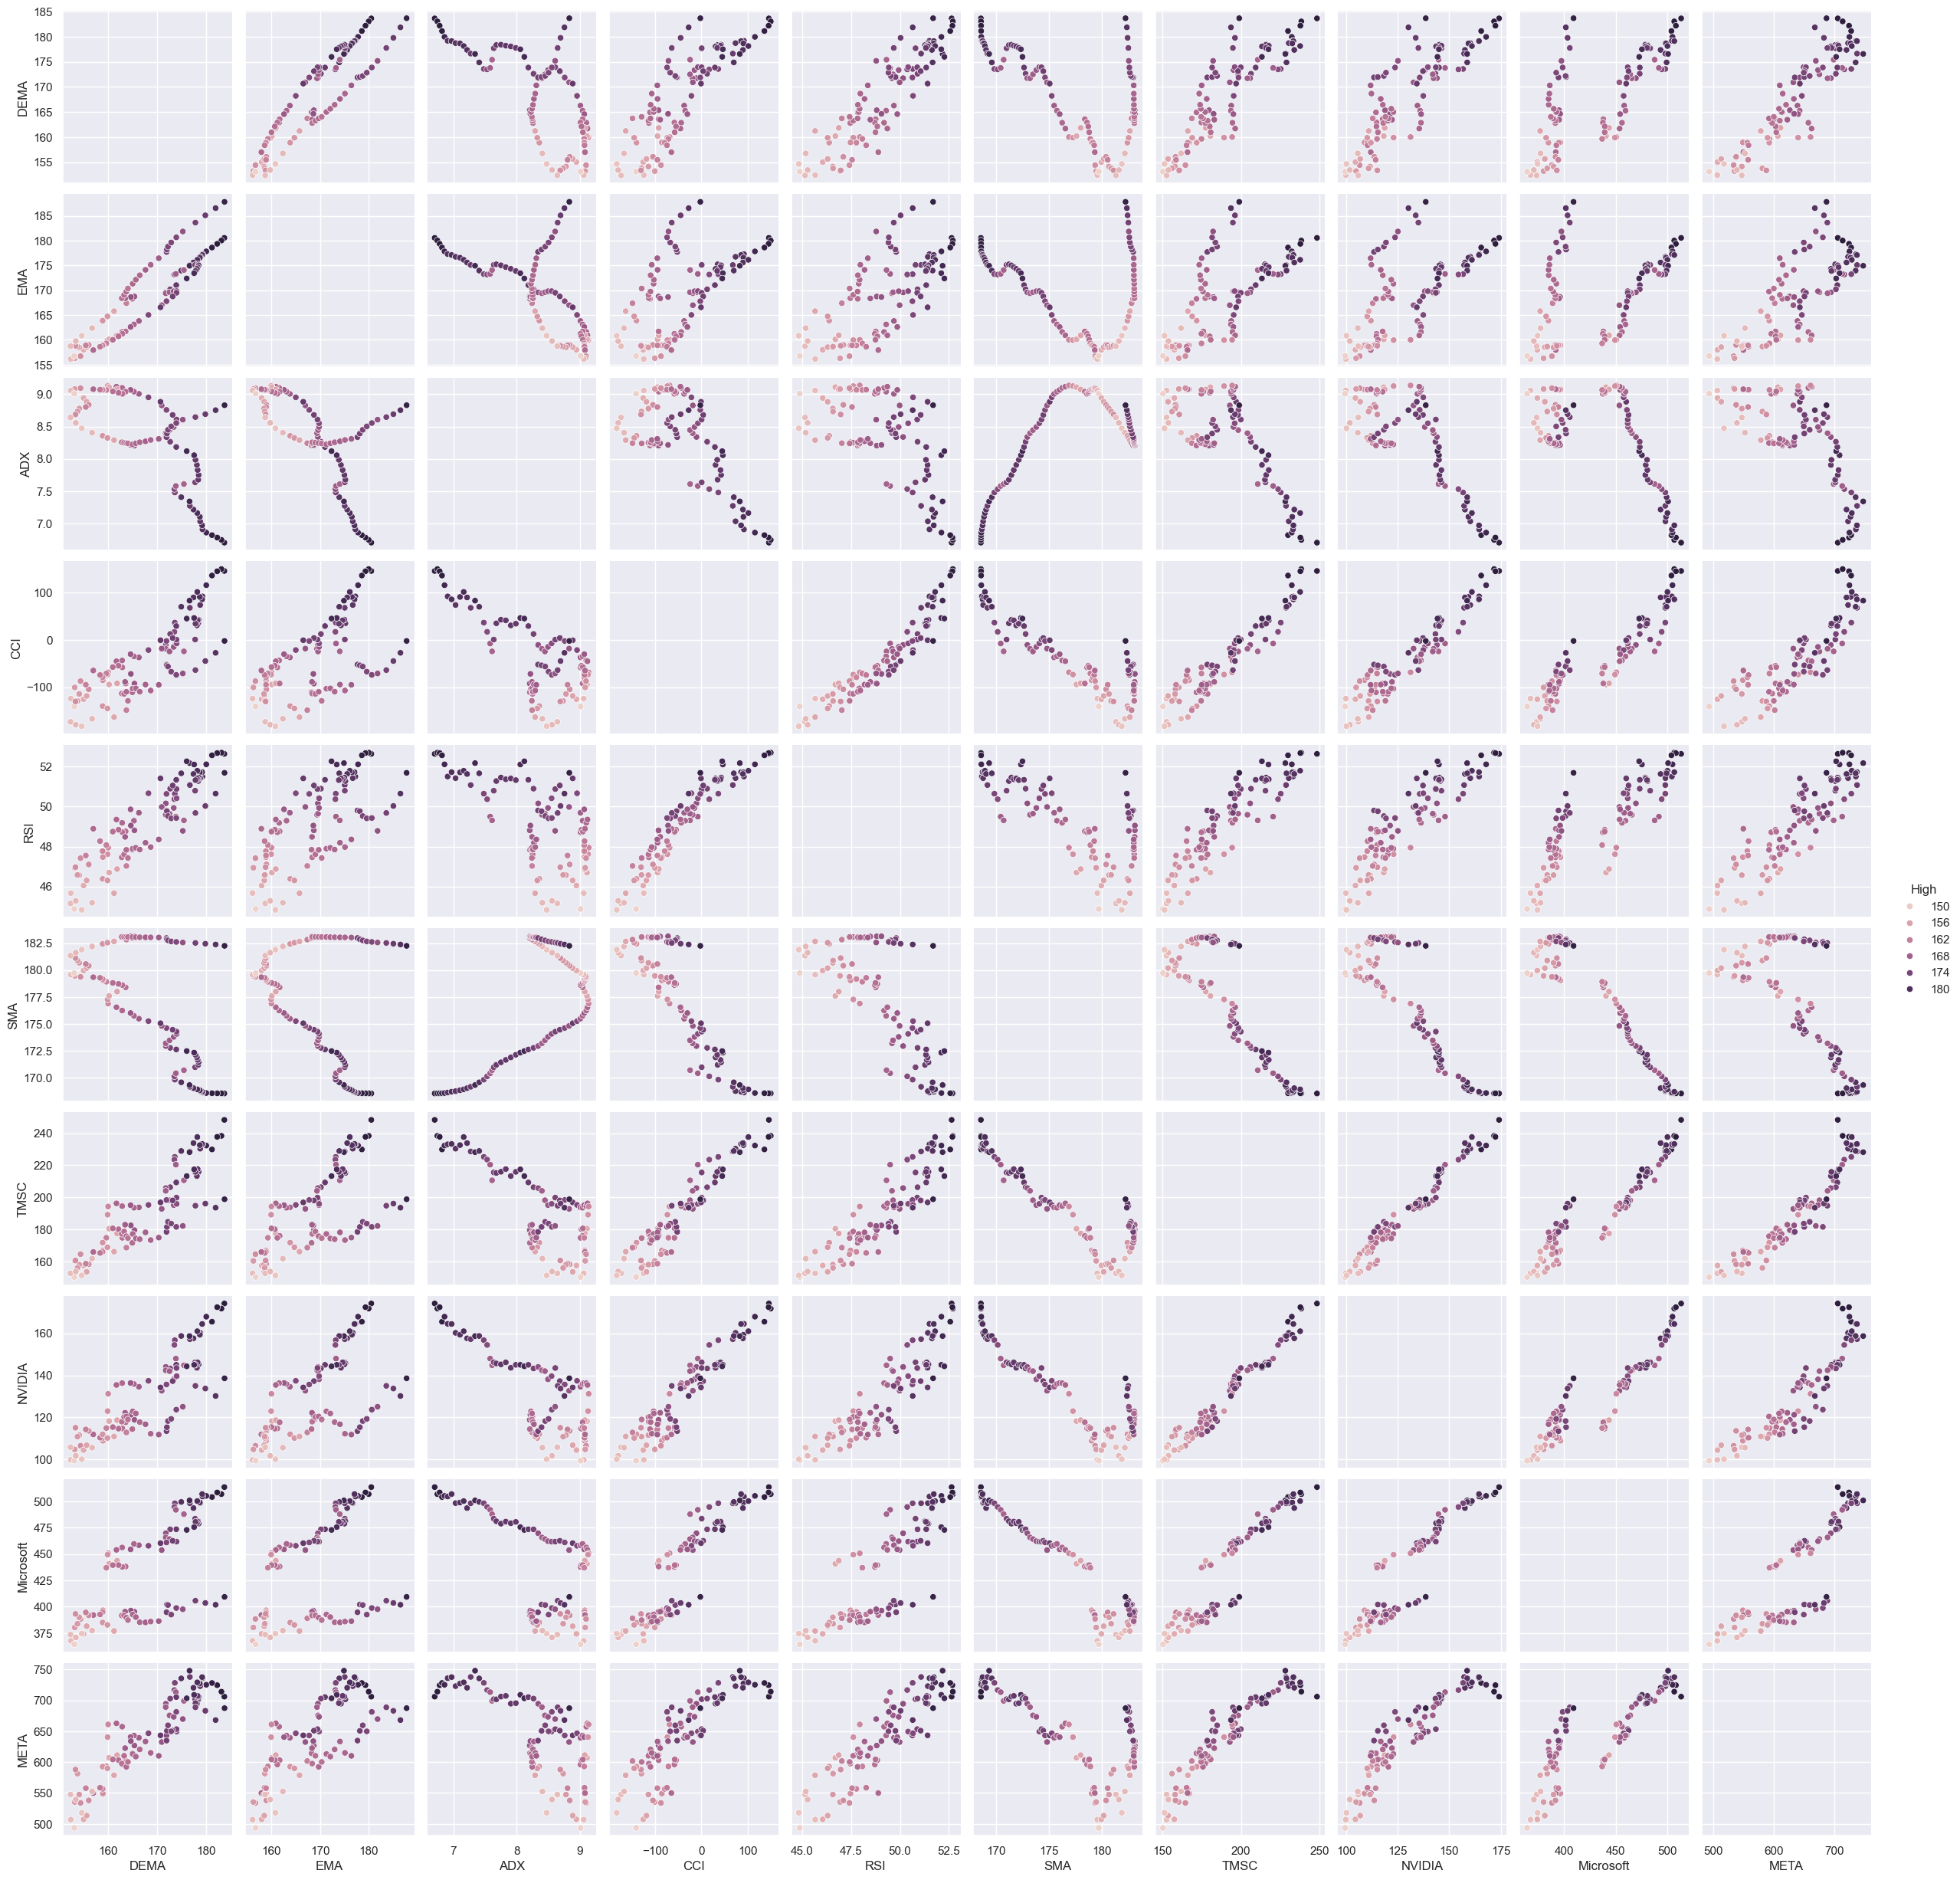

In [52]:
sns.set()
sns.pairplot(df, hue="High")

<Figure size 1200x800 with 0 Axes>

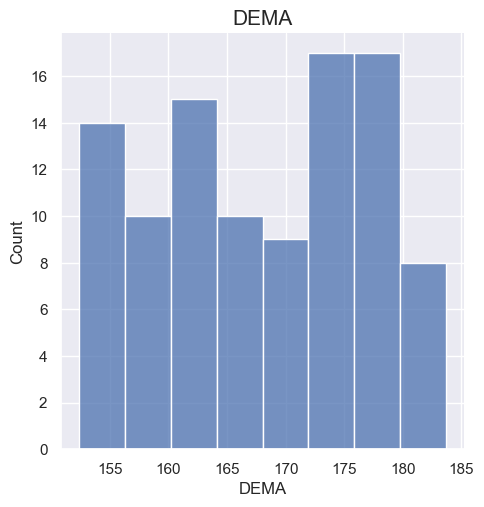

<Figure size 1200x800 with 0 Axes>

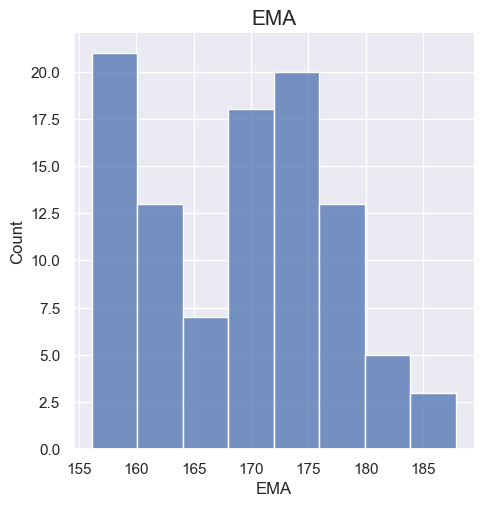

<Figure size 1200x800 with 0 Axes>

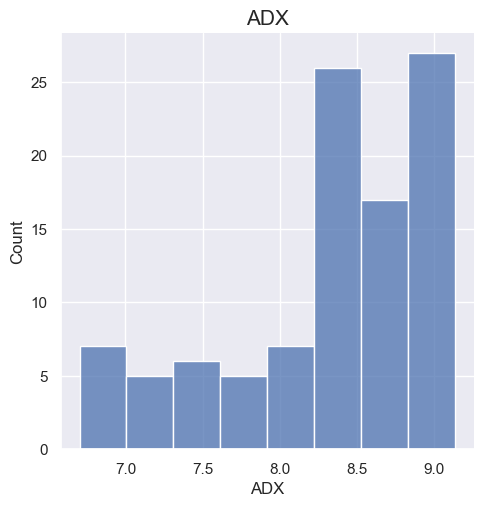

<Figure size 1200x800 with 0 Axes>

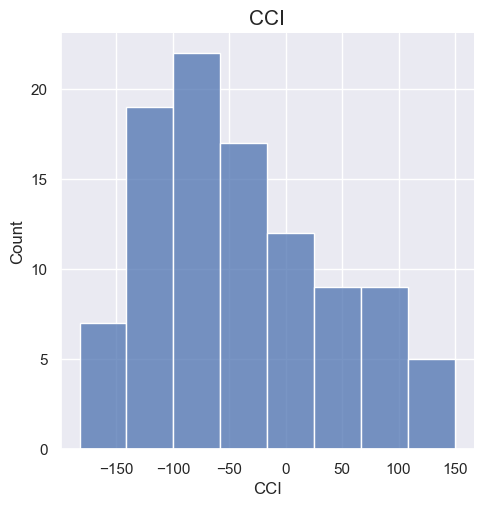

<Figure size 1200x800 with 0 Axes>

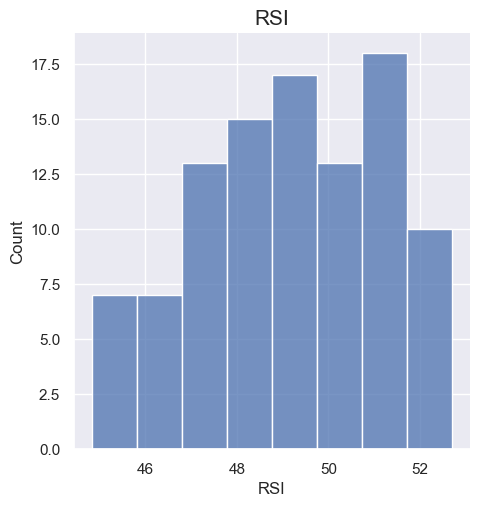

<Figure size 1200x800 with 0 Axes>

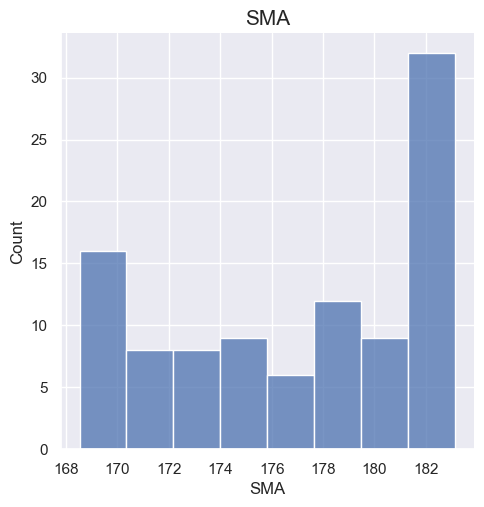

<Figure size 1200x800 with 0 Axes>

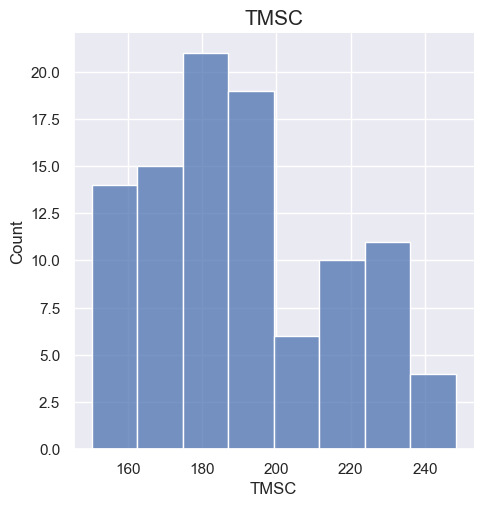

<Figure size 1200x800 with 0 Axes>

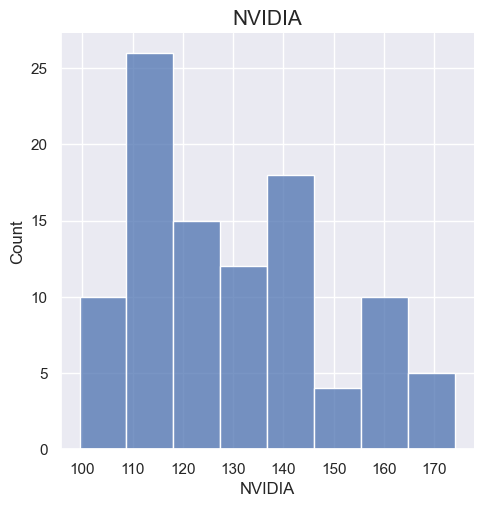

<Figure size 1200x800 with 0 Axes>

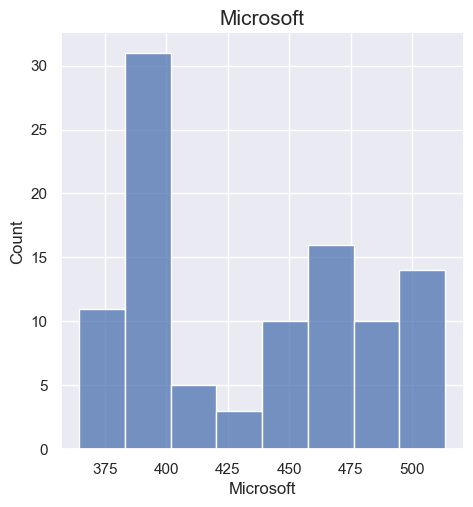

<Figure size 1200x800 with 0 Axes>

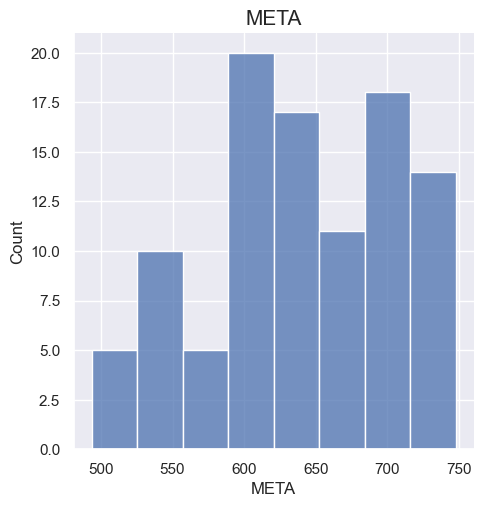

In [53]:
for col in df.drop(["High", "Date"], axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.displot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()
#microsoft stock value  jumped in  april end  to start of may 2025 : due to the release of earnings reports

In [54]:
cor_df=df.drop(columns=['Date']).corr()

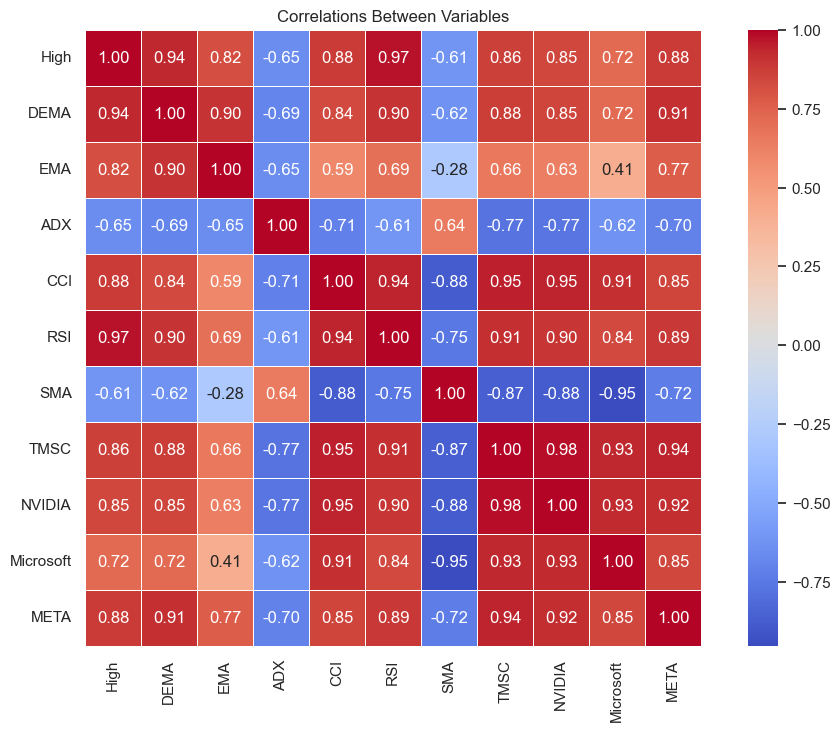

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(cor_df, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlations Between Variables")
plt.show()

In [56]:
X = df.drop(columns=['Date', 'High'])
y = df['High']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
test_dates = df.loc[X_test.index, 'Date']

In [58]:
gbr=GradientBoostingRegressor()
lr=LinearRegression()
ridge= Ridge()
lasso = Lasso()
randomfr = RandomForestRegressor()

In [59]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
lr.fit(X_train, y_train)
y_pred_lr= lr.predict(X_test)
ridge.fit(X_train, y_train)
y_pred_ridge= ridge.predict(X_test)
lasso.fit(X_train, y_train)
y_pred_lasso= lasso.predict(X_test)
randomfr.fit(X_train, y_train)
y_pred_randomfr= randomfr.predict(X_test)

In [60]:
accuracy = r2_score(y_test, y_pred)
print(f"R^2 Accuracy for gradient boosting: {accuracy:.4f}")
accuracy_lr = r2_score(y_test, y_pred_lr)
print(f"R^2 Accuracy for linear regression: {accuracy_lr:.4f}")
accuracy_ridge = r2_score(y_test, y_pred_ridge)
print(f"R^2 Accuracy for ridge regression: {accuracy_ridge:.4f}")
accuracy_lasso = r2_score(y_test, y_pred_lasso)
print(f"R^2 Accuracy for lasso : {accuracy_lasso:.4f}")
accuracy_randomfr = r2_score(y_test, y_pred_randomfr)
print(f"R^2 Accuracy for random forest: {accuracy_randomfr:.4f}")

R^2 Accuracy for gradient boosting: 0.9873
R^2 Accuracy for linear regression: 0.9994
R^2 Accuracy for ridge regression: 0.9986
R^2 Accuracy for lasso : 0.9537
R^2 Accuracy for random forest: 0.9701


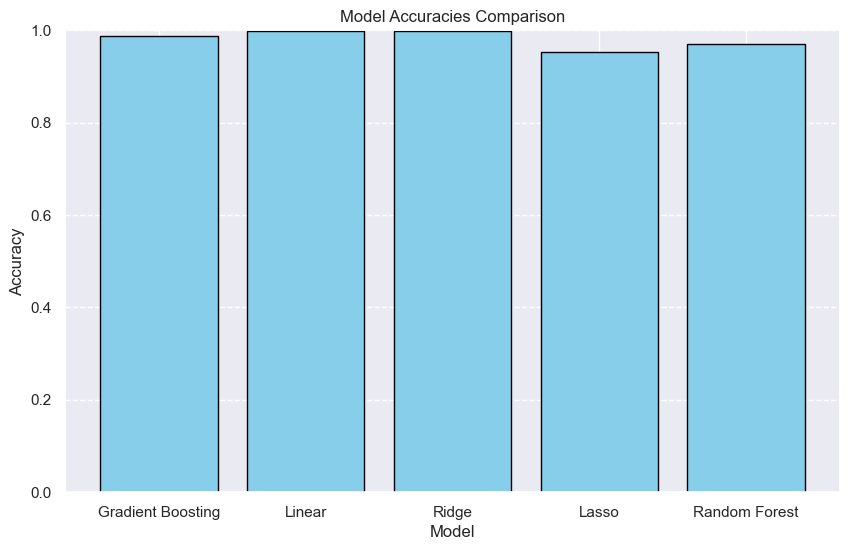

In [61]:
model_names = ['Gradient Boosting','Linear', 'Ridge', 'Lasso', 'Random Forest']
accuracies = [accuracy,accuracy_lr,accuracy_ridge,accuracy_lasso,accuracy_randomfr]
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue', edgecolor='black')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--')

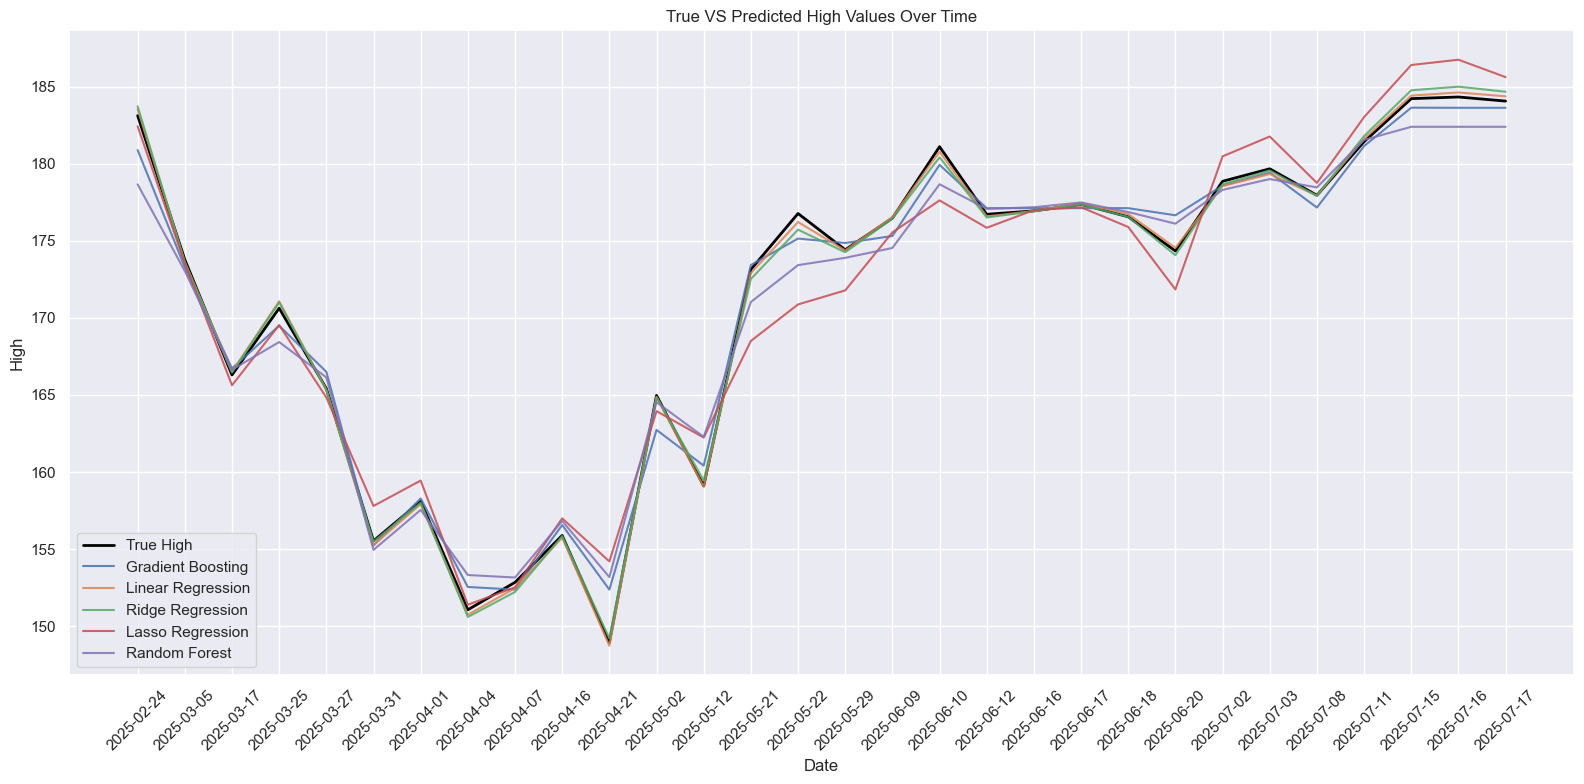

In [62]:
plot_df = pd.DataFrame({
    'Date': test_dates,
    'True High': y_test,
    'Gradient Boosting': y_pred,
    'Linear Regression': y_pred_lr,
    'Ridge Regression': y_pred_ridge,
    'Lasso Regression': y_pred_lasso,
    'Random Forest': y_pred_randomfr
})
plot_df = plot_df.sort_values(by='Date')
plt.figure(figsize=(16,8))
plt.plot(plot_df['Date'], plot_df['True High'], label='True High', color='black', linewidth=2)
plt.plot(plot_df['Date'], plot_df['Gradient Boosting'], label='Gradient Boosting', alpha=0.85)
plt.plot(plot_df['Date'], plot_df['Linear Regression'], label='Linear Regression', alpha=0.85)
plt.plot(plot_df['Date'], plot_df['Ridge Regression'], label='Ridge Regression', alpha=0.85)
plt.plot(plot_df['Date'], plot_df['Lasso Regression'], label='Lasso Regression', alpha=0.85)
plt.plot(plot_df['Date'], plot_df['Random Forest'], label='Random Forest', alpha=0.85)
plt.xlabel('Date')
plt.ylabel('High')
plt.title('True VS Predicted High Values Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()